# <div style="color:white;display:fill;border-radius:5px;background-color:#560BAD;letter-spacing:0.5px;overflow:hidden"><p style="padding:20px;color:white;overflow:hidden;text-align: center;margin:0;font-size:120%">Exploratory Data Analysis</p></div> 

- **Exploratory Data Analysis** 
    - Libraries
    - Configurations
    - Hypothesis
    - Mind Map Business
    - Summary Table
    - Bivariate Analysis
         - Cancelations by Hotel
         - Cancelations by Month
         - Cancelations by Lead Time
         - Cancelations by Country
         - Cancelations by Market Segment
         - Cancelations by Agency
         - Cancelations by Company
         - Cancelations by Deposit Type
         - About ADR

## <div style="color:white;display:fill;border-radius:5px;background-color:#3F37C9;letter-spacing:0.5px;overflow:hidden"><p style="padding:15px;color:white;overflow:hidden;text-align: center;margin:0;font-size:120%">Libraries</p></div>

In [1]:
# Basic Tools
import numpy as np
import pandas as pd
from datetime import datetime as dt
import sys

# Visualization Tools
from matplotlib import pyplot as plt
from matplotlib import rcParams
%matplotlib inline
import seaborn as sns
from PIL import Image
from IPython.display import display
import sweetviz as sv

#!{sys.executable} -m pip install pandas-profiling
from pandas_profiling import ProfileReport

import warnings

import warnings
warnings.filterwarnings( 'ignore' )






c:\Users\yves.moura\.conda\envs\olx\lib\site-packages\numba\core\decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
c:\Users\yves.moura\.conda\envs\olx\lib\site-packages\visions\backends\shared\nan_handling.py:51: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def hasna(x: np.ndarray) -> bool:
C:\Users\yves.moura\AppData\Local\Temp\ipykernel_8028\2051757776.py:17: DeprecationWarning: `import pandas_profiling` is going 

In [2]:
data = pd.read_csv('../data/processed/data_processed.csv')

In [3]:
data.shape

(5880, 28)

## <div style="color:white;display:fill;border-radius:5px;background-color:#3F37C9;letter-spacing:0.5px;overflow:hidden"><p style="padding:15px;color:white;overflow:hidden;text-align: center;margin:0;font-size:120%">Configurations</p></div>

In [4]:
def pandas_settings():
    pd.options.display.float_format = '{:,.4f}'.format
    pd.set_option('display.expand_frame_repr', False )
    pd.set_option('display.max_columns', 35)
    pd.set_option('display.max_rows', 50)
    

pandas_settings()

In [5]:
def plot_settings():  
    
    #plt.style.use('whitegrid')
    # Set Matplotlib defaults
    plt.rc('figure', figsize=(16,8))
    #plt.rc('axes', labelweight='bold', labelsize='large', titleweight='bold', titlesize=14, titlepad=10)
    plt.rc('animation', html='html5')
    plt.rc('axes',titlesize=14)
    rcParams['axes.spines.top'] = False
    rcParams['axes.spines.right'] = False
    
    #%config InlineBackend.figure_format='retina'
    sns.set(style='whitegrid')#palette='muted', , font_scale=1.2
    #HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#93D30C", "#8F00FF"]
    #HAPPY_COLORS_PALETTE = ["#f72585", "#b5179e", "#560bad", "#3a0ca3", "#3f37c9", "#4361ee", "#4895ef", "#4cc9f0"]
    HAPPY_COLORS_PALETTE = ["#f72585", "#560bad", "#3f37c9", "#4361ee", "#4cc9f0"]
    sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))
    
plot_settings()

In [6]:
def summary_stats(df):
    numerical_features = df.select_dtypes(include = 'number').columns.values
    df = df[numerical_features]
    
    count_ = pd.DataFrame(df.apply(np.size))
    #pct_ = pd.DataFrame(df.apply(np.size)/len(data_raw)*100)
    pct_ = pd.DataFrame(df.apply(np.size)/len(data)*100)
    sum_ = pd.DataFrame(df.apply(np.sum))
    mean_ = pd.DataFrame(df.apply(np.mean))
    std_ = pd.DataFrame(df.apply(np.std))
    median_ = pd.DataFrame(df.apply(np.median))
    
    min_ = pd.DataFrame(df.apply(min))
    max_ = pd.DataFrame(df.apply(max))
    range_ = pd.DataFrame(df.apply(lambda x: x.max() - x.min()))
    q1_ = pd.DataFrame(df.apply(lambda x: np.percentile(x,25)))
    q3_ = pd.DataFrame(df.apply(lambda x: np.percentile(x,75)))
    
    skewness_= pd.DataFrame(df.apply(lambda x: x.skew()))
    kurtosis_ = pd.DataFrame(df.apply(lambda x: x.kurtosis()))
    
    summary = pd.concat([count_, pct_, mean_, std_, median_, sum_, min_, max_, range_, q1_,q3_, skewness_, kurtosis_],axis=1)
    summary.columns = ['counts', 'pct_raw','mean','std','median','sum','min','max', 'range', '25%','75%', 'skew', 'kur']
 

    cm = sns.light_palette("#4cc9f0", as_cmap = True)
    
    display(summary.style.format('{:.2f}').background_gradient(subset=(summary.index[3:],summary.columns[:]),cmap=cm))

## <div style="color:white;display:fill;border-radius:5px;background-color:#3F37C9;letter-spacing:0.5px;overflow:hidden"><p style="padding:15px;color:white;overflow:hidden;text-align: center;margin:0;font-size:120%">Hypothesis</p></div>

In [7]:
data.head()

,bathrooms,condominio,garage_spaces,price,rooms,size,zipcode,re_types,re_rent_full_price,condominio_fechado,elevador,permitido_animais,piscina,portaria,portao_eletronico,salao_de_festas,seguranca24_h,academia,area_murada.1,ar_condicionado,armarios_na_cozinha,armarios_no_quarto,churrasqueira,mobiliado,quarto_de_servico,varanda,area_de_servico,size_comodo
0,1,270,1,140000,2,58,41150115,Padrão,NaN,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,3
1,4,1080,2,590000,3,105,40296320,Padrão,NaN,0,0,0,1,0,0,1,1,1,0,1,1,0,1,0,0,0,0,7
2,3,800,1,690000,3,120,41940340,Padrão,NaN,1,1,1,0,1,0,1,1,1,0,1,1,1,0,0,1,0,1,6
3,2,858,1,420000,2,64,41750000,Padrão,NaN,1,0,1,1,0,0,0,1,0,1,0,1,1,1,0,1,1,0,4
4,3,797,1,460000,3,110,41720060,Padrão,NaN,1,1,1,1,1,0,1,1,1,0,0,1,0,0,0,0,0,0,6


In [8]:
columns_to_check = [#'bathrooms',
                    #'condominio',
                    #'garage_spaces',
                    #'rooms',
                    #'size',
                    #'zipcode',
                    #'size_comodo',
                    'condominio_fechado',
                    'elevador',
                    'permitido_animais',
                    'piscina',
                    'portaria',
                    'salao_de_festas',
                    'seguranca24_h',
                    'academia',
                    'ar_condicionado',
                    'armarios_na_cozinha',
                    'armarios_no_quarto',
                    'churrasqueira',
                    'mobiliado',
                    'quarto_de_servico',
                    'varanda',
                    'area_de_servico']

data = data[~(data[columns_to_check] <= 0).all(axis=1)]


In [9]:
# tenho 674 linhas que o condominio é menor que o valor 1 real ou é vazio 
# verificar a necessidade de usar essa coluna 


# tenho valores muito alto quando a pessoa nao informa a quantidade de garagem 


# caso não informe o size eu já retiro do dado
data = data[~(data['size'] == -1) ]

average_price = data['price'].mean()

# caso o size for maior que 300 e abaixo da media do price vai ser removido
data = data[~(data['size'] > 300) & (data['price'] < average_price)]

# caso o condominio for maior que 1500 e abaixo da média do price vai ser removido
data = data[~(data['condominio'] > 1500) & (data['price'] < average_price)]

## <div style="color:white;display:fill;border-radius:5px;background-color:#3F37C9;letter-spacing:0.5px;overflow:hidden"><p style="padding:15px;color:white;overflow:hidden;text-align: center;margin:0;font-size:120%">Analyse Dataset</p></div>

In [10]:



profile = ProfileReport(data, minimal=True)
profile.to_file(output_file="../reports/analyse_olx.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

- tenho uma grande quantidade de apenas um tipo que vale por 95% da linhas na coluna de re_types
- banheiros é altamente distorcido (γ1 = -22,08082965)

#  Analise Univariada

<Axes: xlabel='price'>

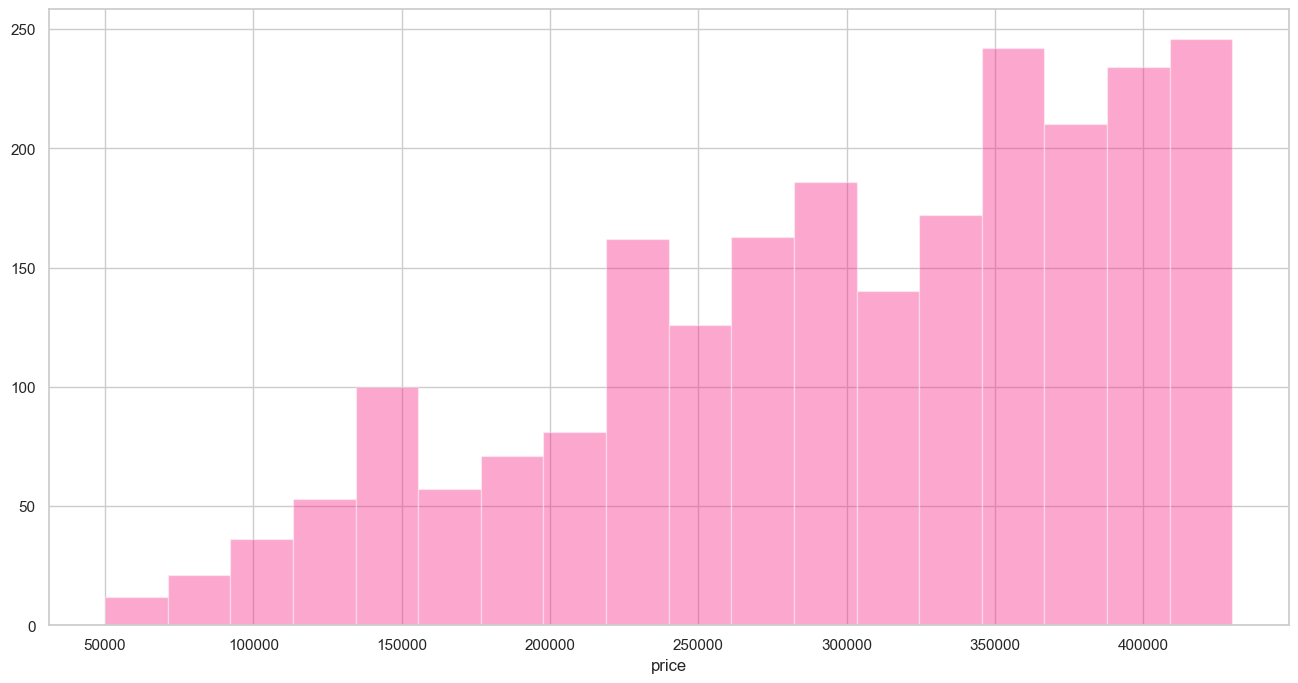

In [11]:
sns.distplot( data['price'], kde=False  )

In [12]:
data['price'].value_counts()

350000    131
380000    114
400000     93
420000     90
320000     60
         ... 
143000      1
279290      1
115200      1
409999      1
277000      1
Name: price, Length: 281, dtype: int64

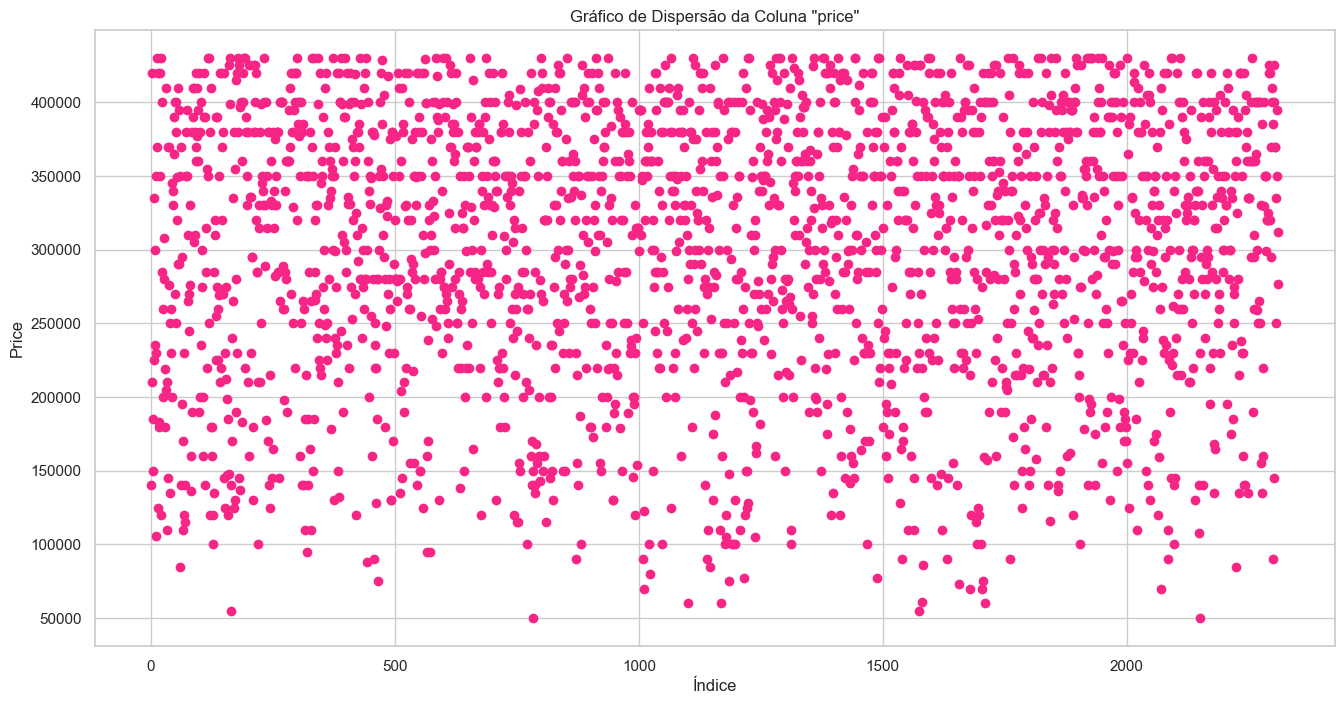

In [13]:
# mostra pela quantdade de linhas do meu data set como ta espalhado o price 
prices = data['price']
plt.figure(figsize=(16, 8))
plt.scatter(range(len(prices)), prices)
plt.title('Gráfico de Dispersão da Coluna "price"')
plt.xlabel('Índice')
plt.ylabel('Price')
plt.show()

In [14]:
teste = data[(data['price'] > 2000000) & (data['size'] < 100) ]
teste.head(100)

,bathrooms,condominio,garage_spaces,price,rooms,size,zipcode,re_types,re_rent_full_price,condominio_fechado,elevador,permitido_animais,piscina,portaria,portao_eletronico,salao_de_festas,seguranca24_h,academia,area_murada.1,ar_condicionado,armarios_na_cozinha,armarios_no_quarto,churrasqueira,mobiliado,quarto_de_servico,varanda,area_de_servico,size_comodo


<Axes: title={'center': 'Log Normal'}, xlabel='price'>

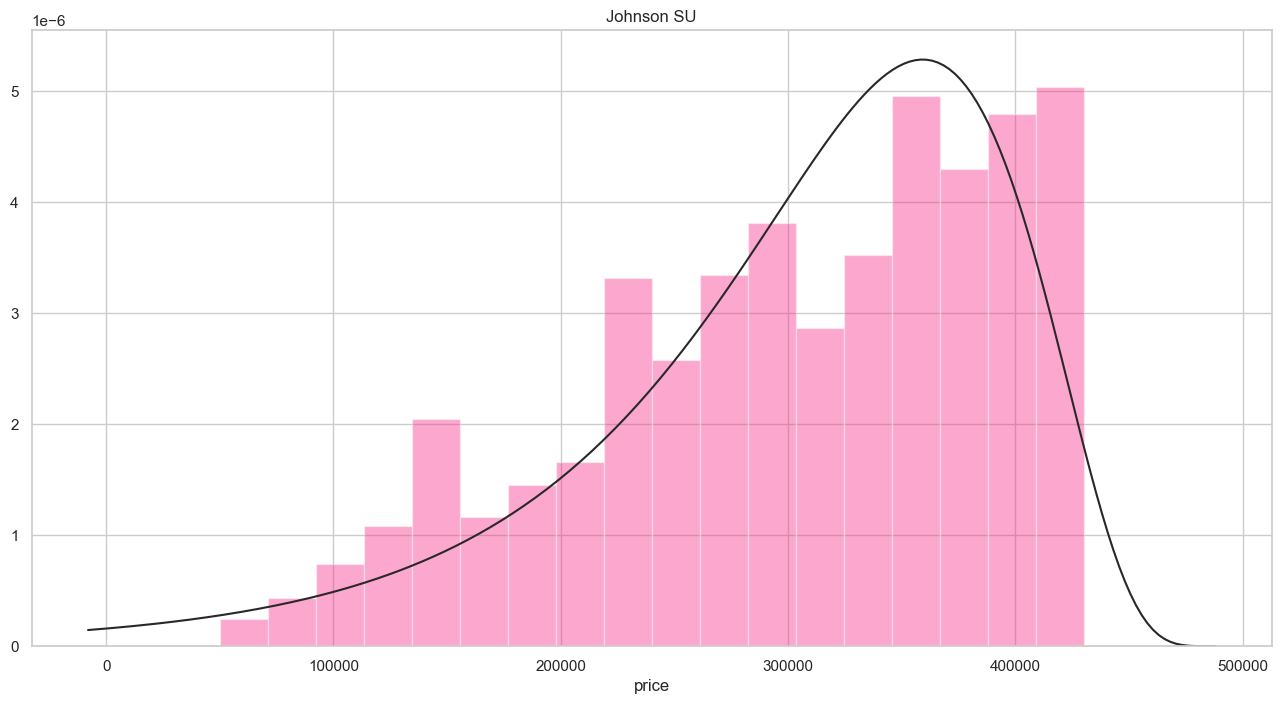

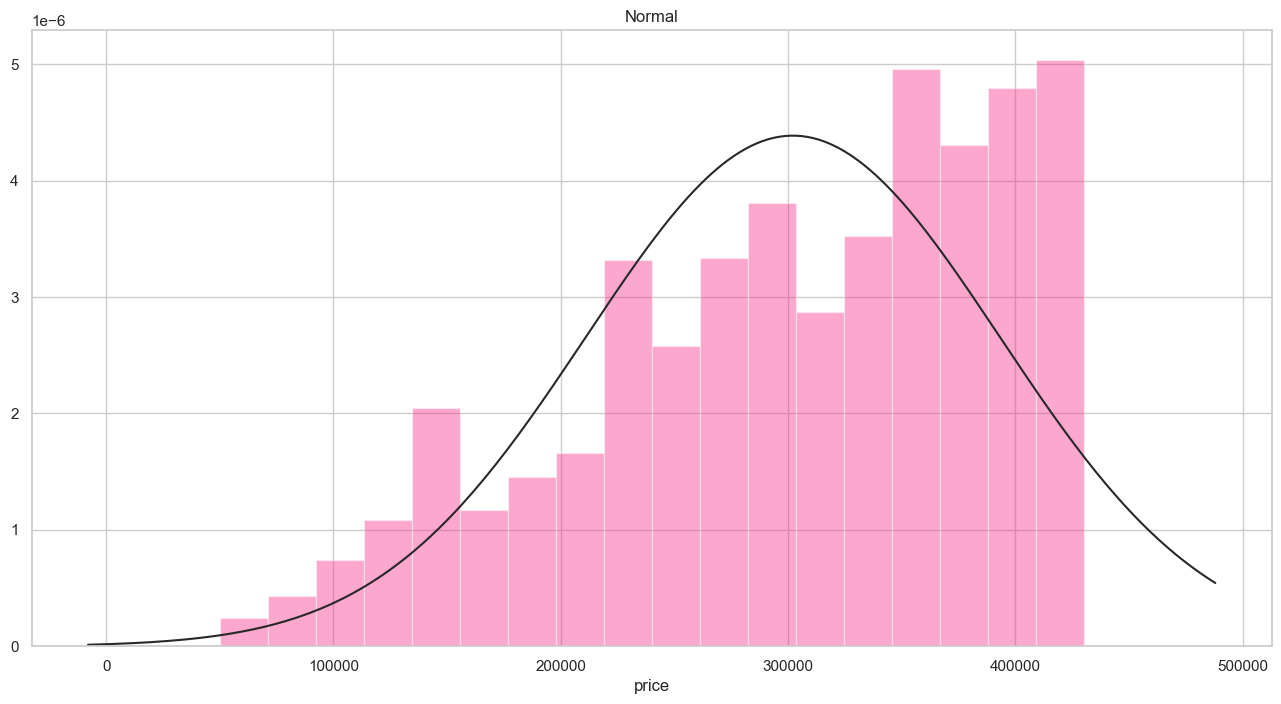

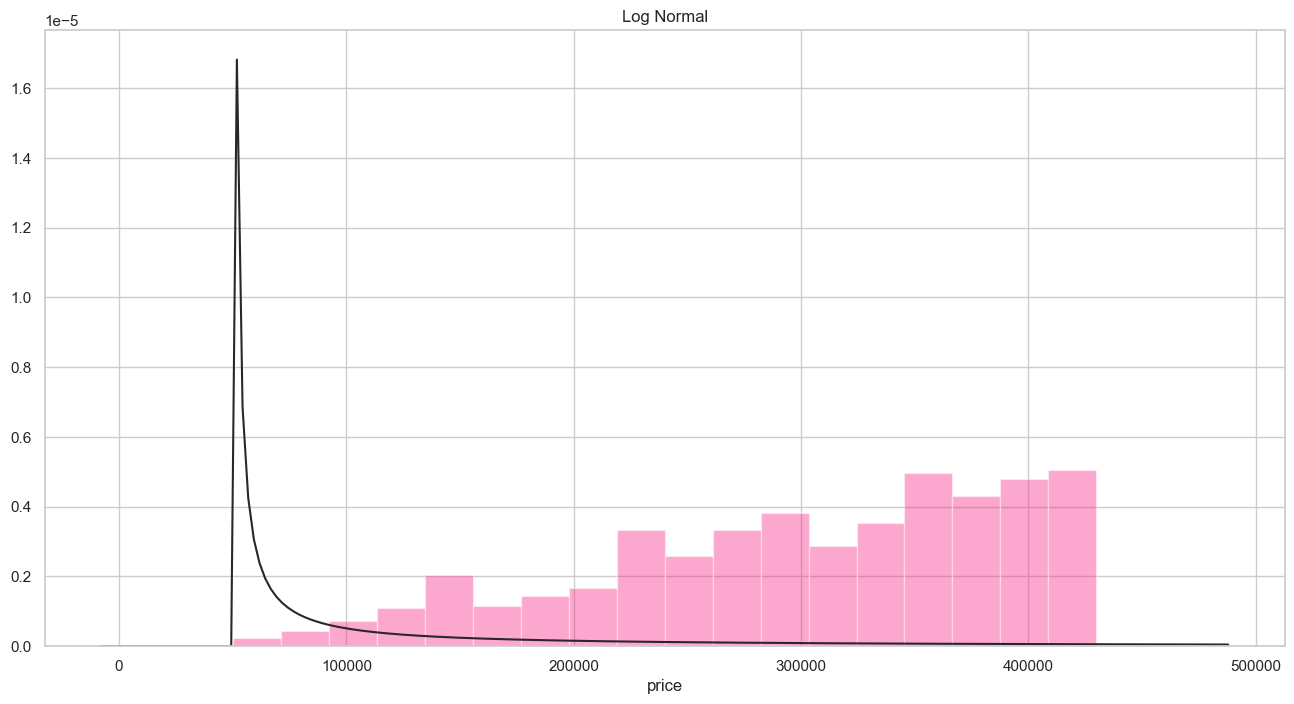

In [15]:
import scipy.stats as st
y = data['price']
plt.figure(1); plt.title('Johnson SU')
sns.distplot(y, kde=False, fit=st.johnsonsu)
plt.figure(2); plt.title('Normal')
sns.distplot(y, kde=False, fit=st.norm)
plt.figure(3); plt.title('Log Normal')
sns.distplot(y, kde=False, fit=st.lognorm)

# Analise Bivariada

### <div style="color:white;display:fill;border-radius:5px;background-color:#4F4F4F;letter-spacing:0.5px;overflow:hidden"><p style="padding:10px;color:white;overflow:hidden;text-align: center;margin:0;font-size:120%">Price por size</p></div>

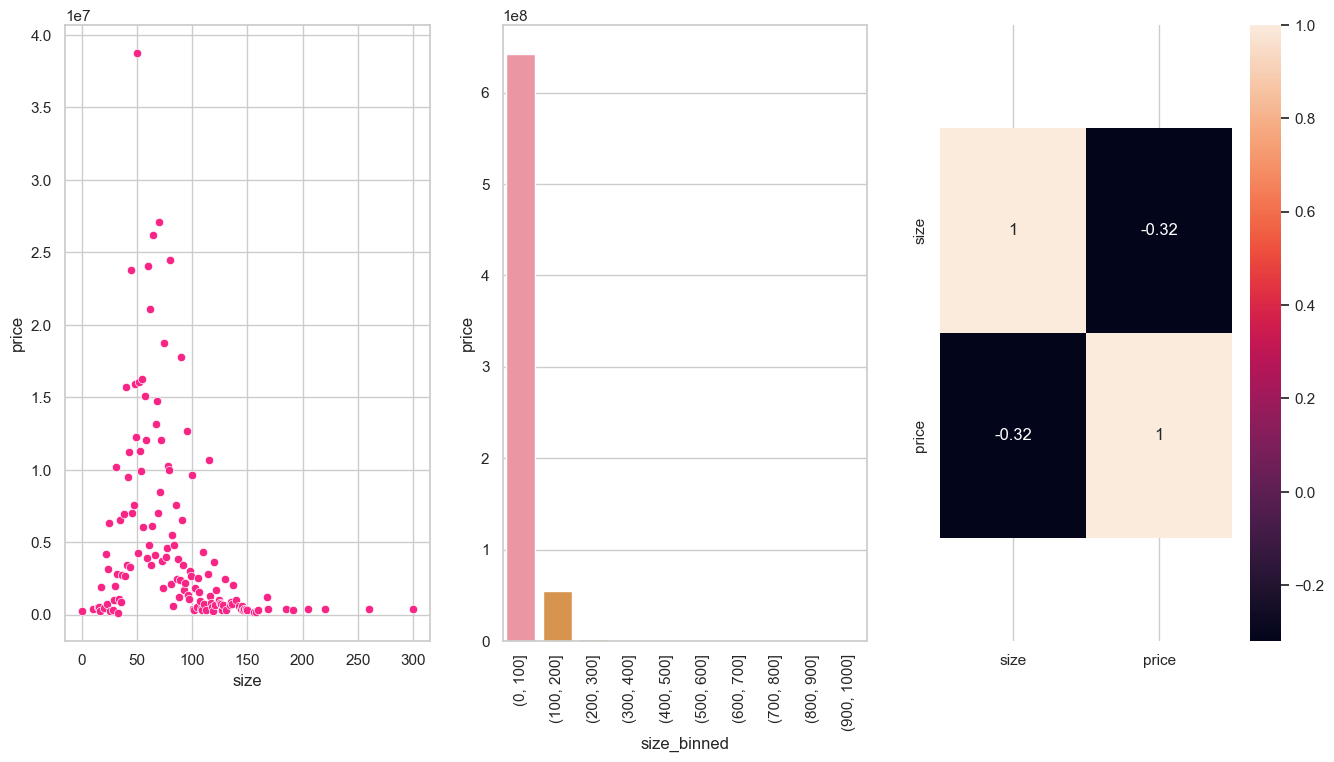

In [16]:
aux1 = data[['size', 'price']].groupby( 'size' ).sum().reset_index()

plt.subplot( 1, 3, 1 )
sns.scatterplot( x ='size', y='price', data=aux1 );



plt.subplot( 1, 3, 2 )
bins = list( np.arange( 0, 1001, 100) )
aux1['size_binned'] = pd.cut( aux1['size'], bins=bins )
aux2 = aux1[['size_binned', 'price']].groupby( 'size_binned' ).sum().reset_index()
sns.barplot( x='size_binned', y='price', data=aux2 );
plt.xticks( rotation=90 );

plt.subplot( 1, 3, 3 )
x = sns.heatmap( aux1.corr( method='pearson' ), annot=True );
bottom, top = x.get_ylim()
x.set_ylim( bottom+0.5, top-0.5 );

In [17]:
# tenho um pequeno numero de apartamentos que informa uma grande quantidade de tamanho mas o valor é baixo

In [18]:
order_by_size = data[data['size'] > 225].sort_values('size', ascending=True)

In [19]:
order_by_size

,bathrooms,condominio,garage_spaces,price,rooms,size,zipcode,re_types,re_rent_full_price,condominio_fechado,elevador,permitido_animais,piscina,portaria,portao_eletronico,salao_de_festas,seguranca24_h,academia,area_murada.1,ar_condicionado,armarios_na_cozinha,armarios_no_quarto,churrasqueira,mobiliado,quarto_de_servico,varanda,area_de_servico,size_comodo
2948,5,750,2,430000,4,260,41900000,Padrão,NaN,0,0,1,0,1,0,1,0,0,0,0,1,1,0,0,1,0,1,9
72,4,150,4,400000,4,300,40265080,Padrão,NaN,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,1,0,8


In [20]:
average_price = data['price'].mean()

In [21]:
filtered_data = data[(data['size'] > 300) & (data['price'] < average_price)]

In [22]:
filtered_data

,bathrooms,condominio,garage_spaces,price,rooms,size,zipcode,re_types,re_rent_full_price,condominio_fechado,elevador,permitido_animais,piscina,portaria,portao_eletronico,salao_de_festas,seguranca24_h,academia,area_murada.1,ar_condicionado,armarios_na_cozinha,armarios_no_quarto,churrasqueira,mobiliado,quarto_de_servico,varanda,area_de_servico,size_comodo


### <div style="color:white;display:fill;border-radius:5px;background-color:#4F4F4F;letter-spacing:0.5px;overflow:hidden"><p style="padding:10px;color:white;overflow:hidden;text-align: center;margin:0;font-size:120%">Price por bathrooms</p></div>

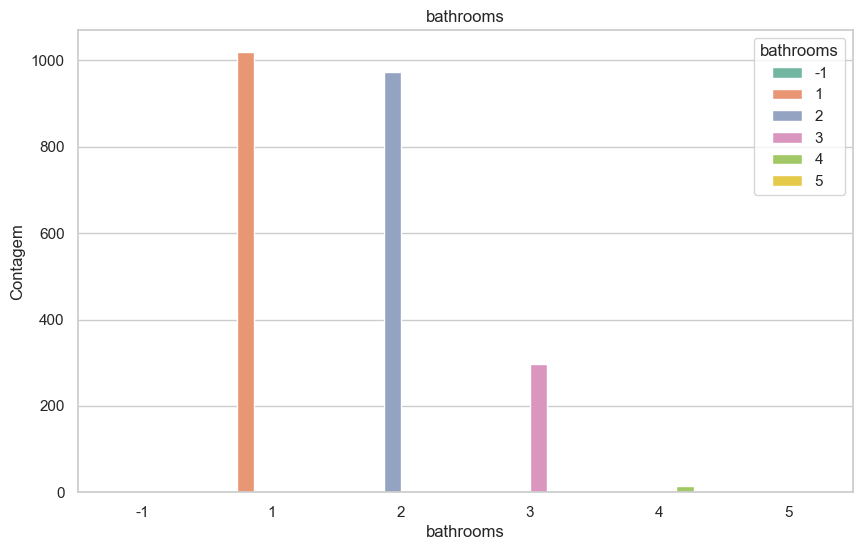

In [23]:
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
sns.countplot(x='bathrooms', hue='bathrooms', data=data, palette="Set2")

plt.title("bathrooms")
plt.xlabel("bathrooms")
plt.ylabel("Contagem")


plt.show()

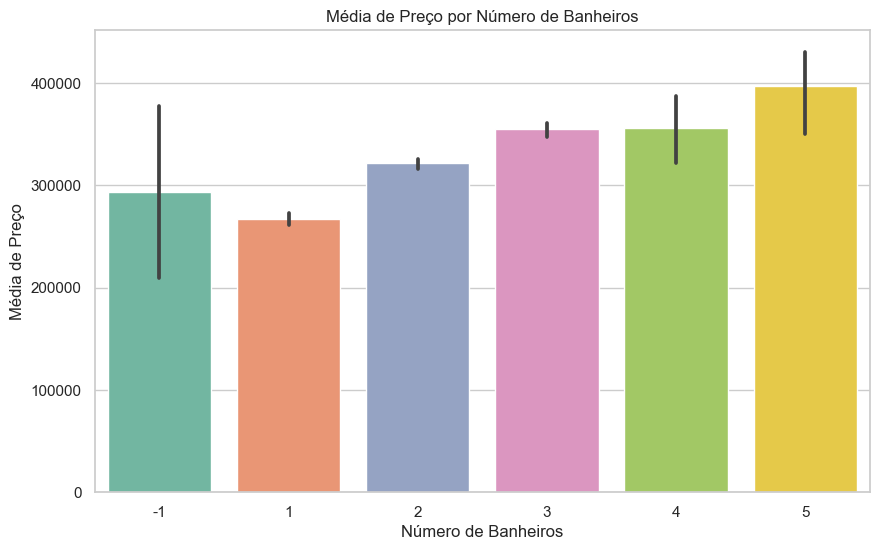

In [24]:

sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))

sns.barplot(x='bathrooms', y='price', data=data, palette="Set2", estimator='mean')

plt.title("Média de Preço por Número de Banheiros")
plt.xlabel("Número de Banheiros")
plt.ylabel("Média de Preço")

plt.show()

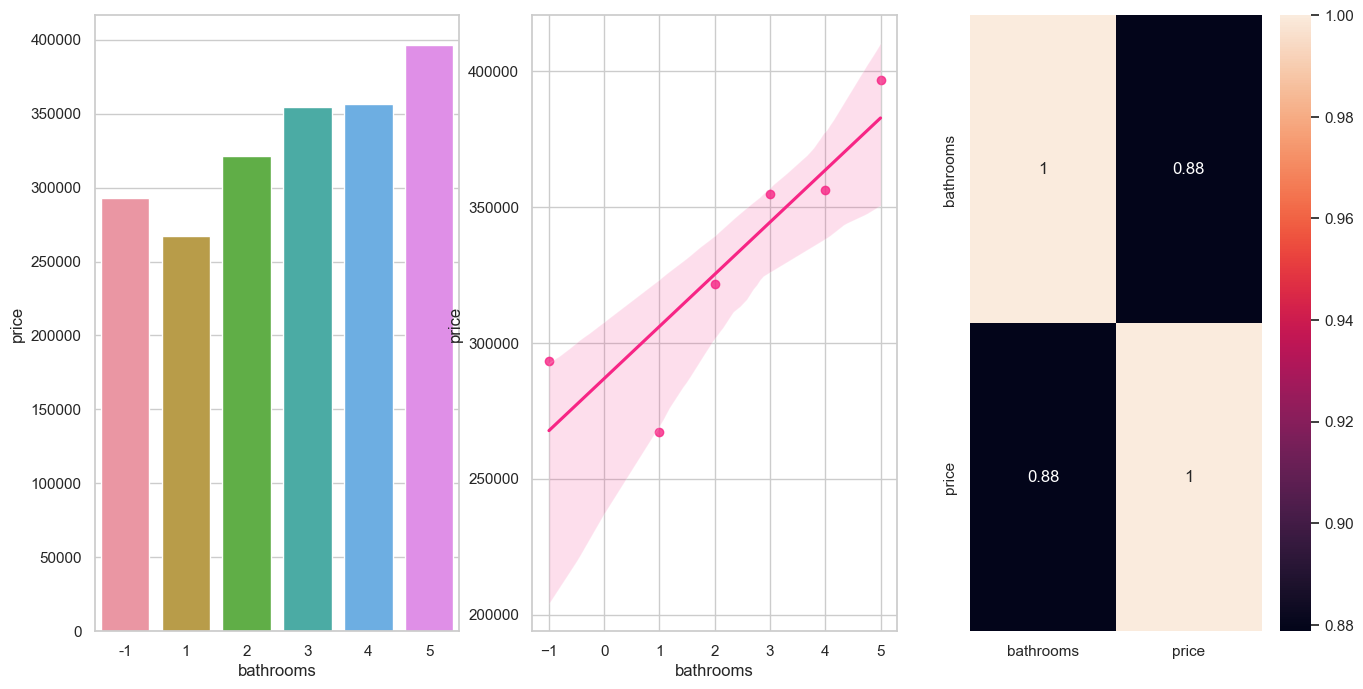

In [25]:
aux1 = data[['bathrooms', 'price']].groupby( 'bathrooms' ).mean().reset_index()

plt.subplot( 1, 3, 1 )
sns.barplot( x='bathrooms', y='price', data=aux1 );

plt.subplot( 1, 3, 2 )
sns.regplot( x='bathrooms', y='price', data=aux1 );

plt.subplot( 1, 3, 3 )
sns.heatmap( aux1.corr( method='pearson' ), annot=True );

In [26]:
data[data['bathrooms'] == 5]

,bathrooms,condominio,garage_spaces,price,rooms,size,zipcode,re_types,re_rent_full_price,condominio_fechado,elevador,permitido_animais,piscina,portaria,portao_eletronico,salao_de_festas,seguranca24_h,academia,area_murada.1,ar_condicionado,armarios_na_cozinha,armarios_no_quarto,churrasqueira,mobiliado,quarto_de_servico,varanda,area_de_servico,size_comodo
619,5,900,2,410000,4,185,40290100,Cobertura,NaN,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,9
1291,5,480,1,350000,2,57,41720010,Padrão,NaN,0,1,1,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,7
2948,5,750,2,430000,4,260,41900000,Padrão,NaN,0,0,1,0,1,0,1,0,0,0,0,1,1,0,0,1,0,1,9


### <div style="color:white;display:fill;border-radius:5px;background-color:#4F4F4F;letter-spacing:0.5px;overflow:hidden"><p style="padding:10px;color:white;overflow:hidden;text-align: center;margin:0;font-size:120%">Price por condominio</p></div>

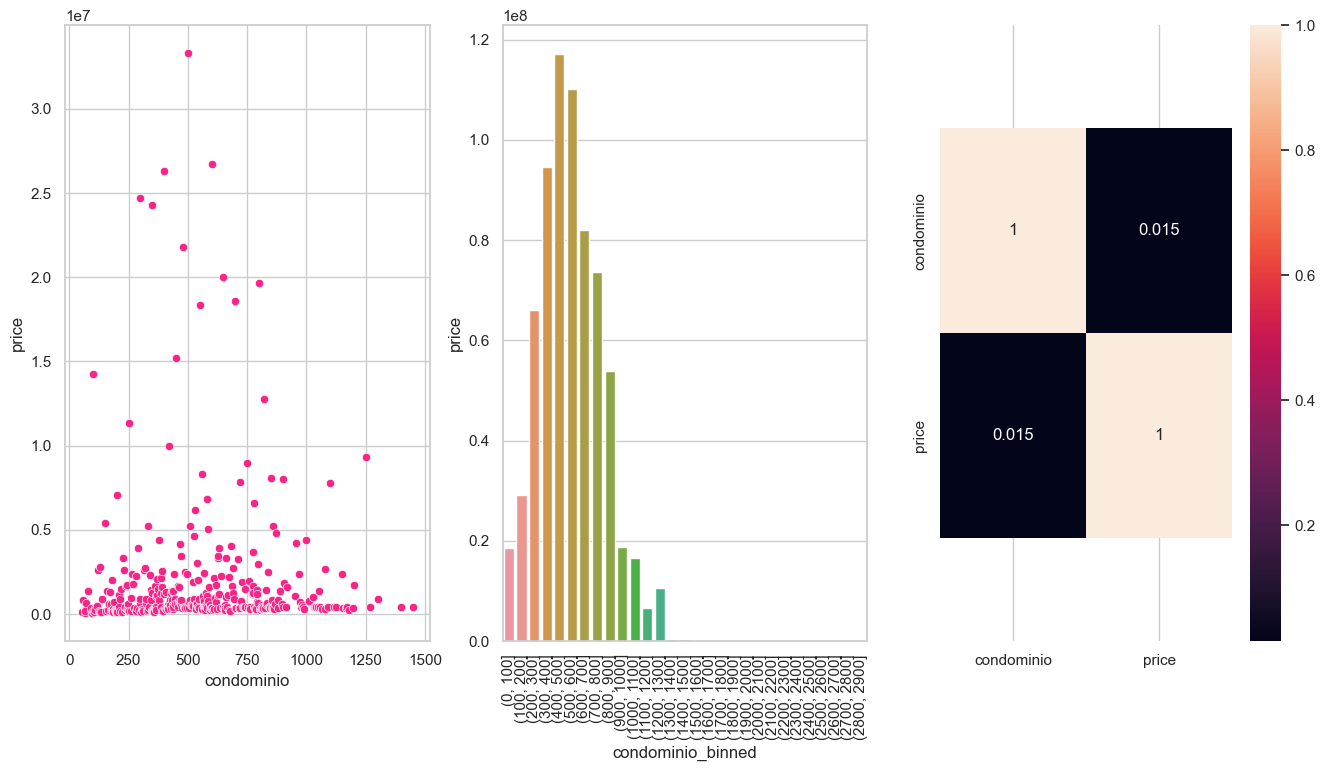

In [27]:
aux1 = data[['condominio', 'price']].groupby( 'condominio' ).sum().reset_index()

plt.subplot( 1, 3, 1 )
sns.scatterplot( x ='condominio', y='price', data=aux1 );



plt.subplot( 1, 3, 2 )
bins = list( np.arange( 0, 3000, 100) )
aux1['condominio_binned'] = pd.cut( aux1['condominio'], bins=bins )
aux2 = aux1[['condominio_binned', 'price']].groupby( 'condominio_binned' ).sum().reset_index()
sns.barplot( x='condominio_binned', y='price', data=aux2 );
plt.xticks( rotation=90 );

plt.subplot( 1, 3, 3 )
x = sns.heatmap( aux1.corr( method='pearson' ), annot=True );
bottom, top = x.get_ylim()
x.set_ylim( bottom+0.5, top-0.5 );

In [28]:
data[data['condominio'] < 1]

,bathrooms,condominio,garage_spaces,price,rooms,size,zipcode,re_types,re_rent_full_price,condominio_fechado,elevador,permitido_animais,piscina,portaria,portao_eletronico,salao_de_festas,seguranca24_h,academia,area_murada.1,ar_condicionado,armarios_na_cozinha,armarios_no_quarto,churrasqueira,mobiliado,quarto_de_servico,varanda,area_de_servico,size_comodo


In [29]:
data[data['condominio'] > 5000]

,bathrooms,condominio,garage_spaces,price,rooms,size,zipcode,re_types,re_rent_full_price,condominio_fechado,elevador,permitido_animais,piscina,portaria,portao_eletronico,salao_de_festas,seguranca24_h,academia,area_murada.1,ar_condicionado,armarios_na_cozinha,armarios_no_quarto,churrasqueira,mobiliado,quarto_de_servico,varanda,area_de_servico,size_comodo


### <div style="color:white;display:fill;border-radius:5px;background-color:#4F4F4F;letter-spacing:0.5px;overflow:hidden"><p style="padding:10px;color:white;overflow:hidden;text-align: center;margin:0;font-sizemm:120%">Price por garage_spaces</p></div>

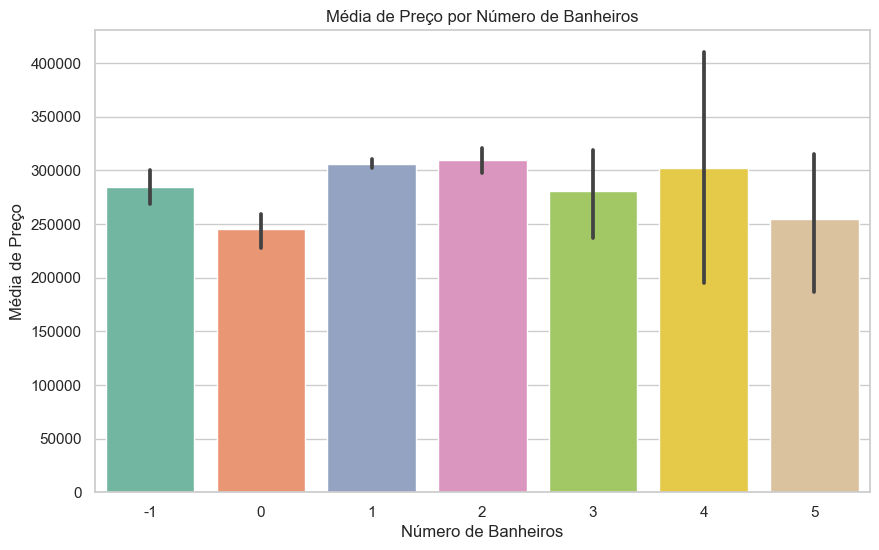

In [30]:

sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))

sns.barplot(x='garage_spaces', y='price', data=data, palette="Set2", estimator='mean')

plt.title("Média de Preço por Número de Banheiros")
plt.xlabel("Número de Banheiros")
plt.ylabel("Média de Preço")

plt.show()

In [31]:
data[data['garage_spaces'] == -1]

,bathrooms,condominio,garage_spaces,price,rooms,size,zipcode,re_types,re_rent_full_price,condominio_fechado,elevador,permitido_animais,piscina,portaria,portao_eletronico,salao_de_festas,seguranca24_h,academia,area_murada.1,ar_condicionado,armarios_na_cozinha,armarios_no_quarto,churrasqueira,mobiliado,quarto_de_servico,varanda,area_de_servico,size_comodo
32,1,130,-1,120000,2,50,41250470,Padrão,NaN,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,3
44,1,100,-1,205000,2,39,41502200,Padrão,NaN,1,1,1,0,1,0,1,1,1,0,0,0,0,1,0,0,0,0,3
114,3,250,-1,270000,2,68,41810640,Padrão,NaN,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,1,0,5
121,1,120,-1,160000,2,55,41194115,Padrão,NaN,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,3
174,3,900,-1,390000,2,72,40270240,Padrão,NaN,1,1,1,1,1,0,1,0,1,0,1,0,0,1,0,0,1,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5489,1,800,-1,400000,2,91,40150122,Padrão,NaN,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,3
5496,1,200,-1,195000,2,65,40255265,Padrão,NaN,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,3
5503,2,629,-1,380000,2,58,41181010,Padrão,NaN,1,1,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,4
5536,2,550,-1,350000,2,80,40285500,Padrão,NaN,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,4


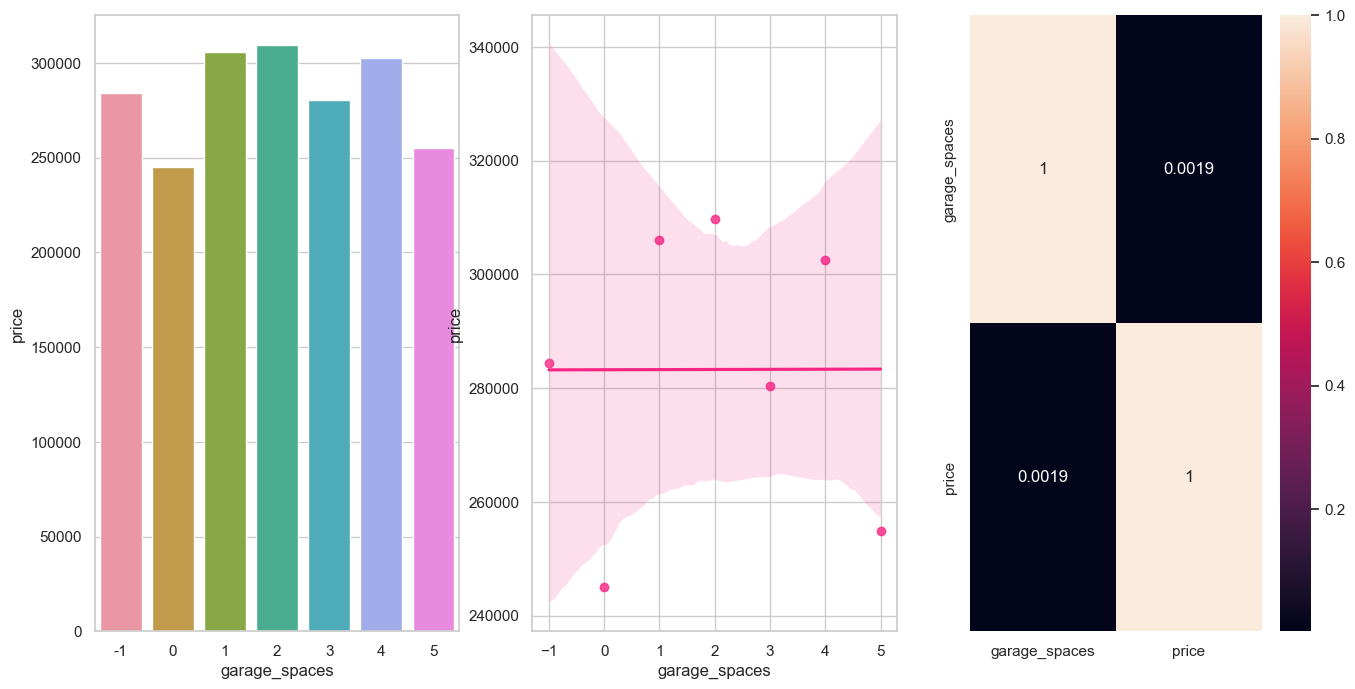

In [32]:
aux1 = data[['garage_spaces', 'price']].groupby( 'garage_spaces' ).mean().reset_index()

plt.subplot( 1, 3, 1 )
sns.barplot( x='garage_spaces', y='price', data=aux1 );

plt.subplot( 1, 3, 2 )
sns.regplot( x='garage_spaces', y='price', data=aux1 );

plt.subplot( 1, 3, 3 )
sns.heatmap( aux1.corr( method='pearson' ), annot=True );

In [33]:
data.columns

Index(['bathrooms', 'condominio', 'garage_spaces', 'price', 'rooms', 'size',
       'zipcode', 're_types', 're_rent_full_price', 'condominio_fechado',
       'elevador', 'permitido_animais', 'piscina', 'portaria',
       'portao_eletronico', 'salao_de_festas', 'seguranca24_h', 'academia',
       'area_murada.1', 'ar_condicionado', 'armarios_na_cozinha',
       'armarios_no_quarto', 'churrasqueira', 'mobiliado', 'quarto_de_servico',
       'varanda', 'area_de_servico', 'size_comodo'],
      dtype='object')

# Multivariated Analysis

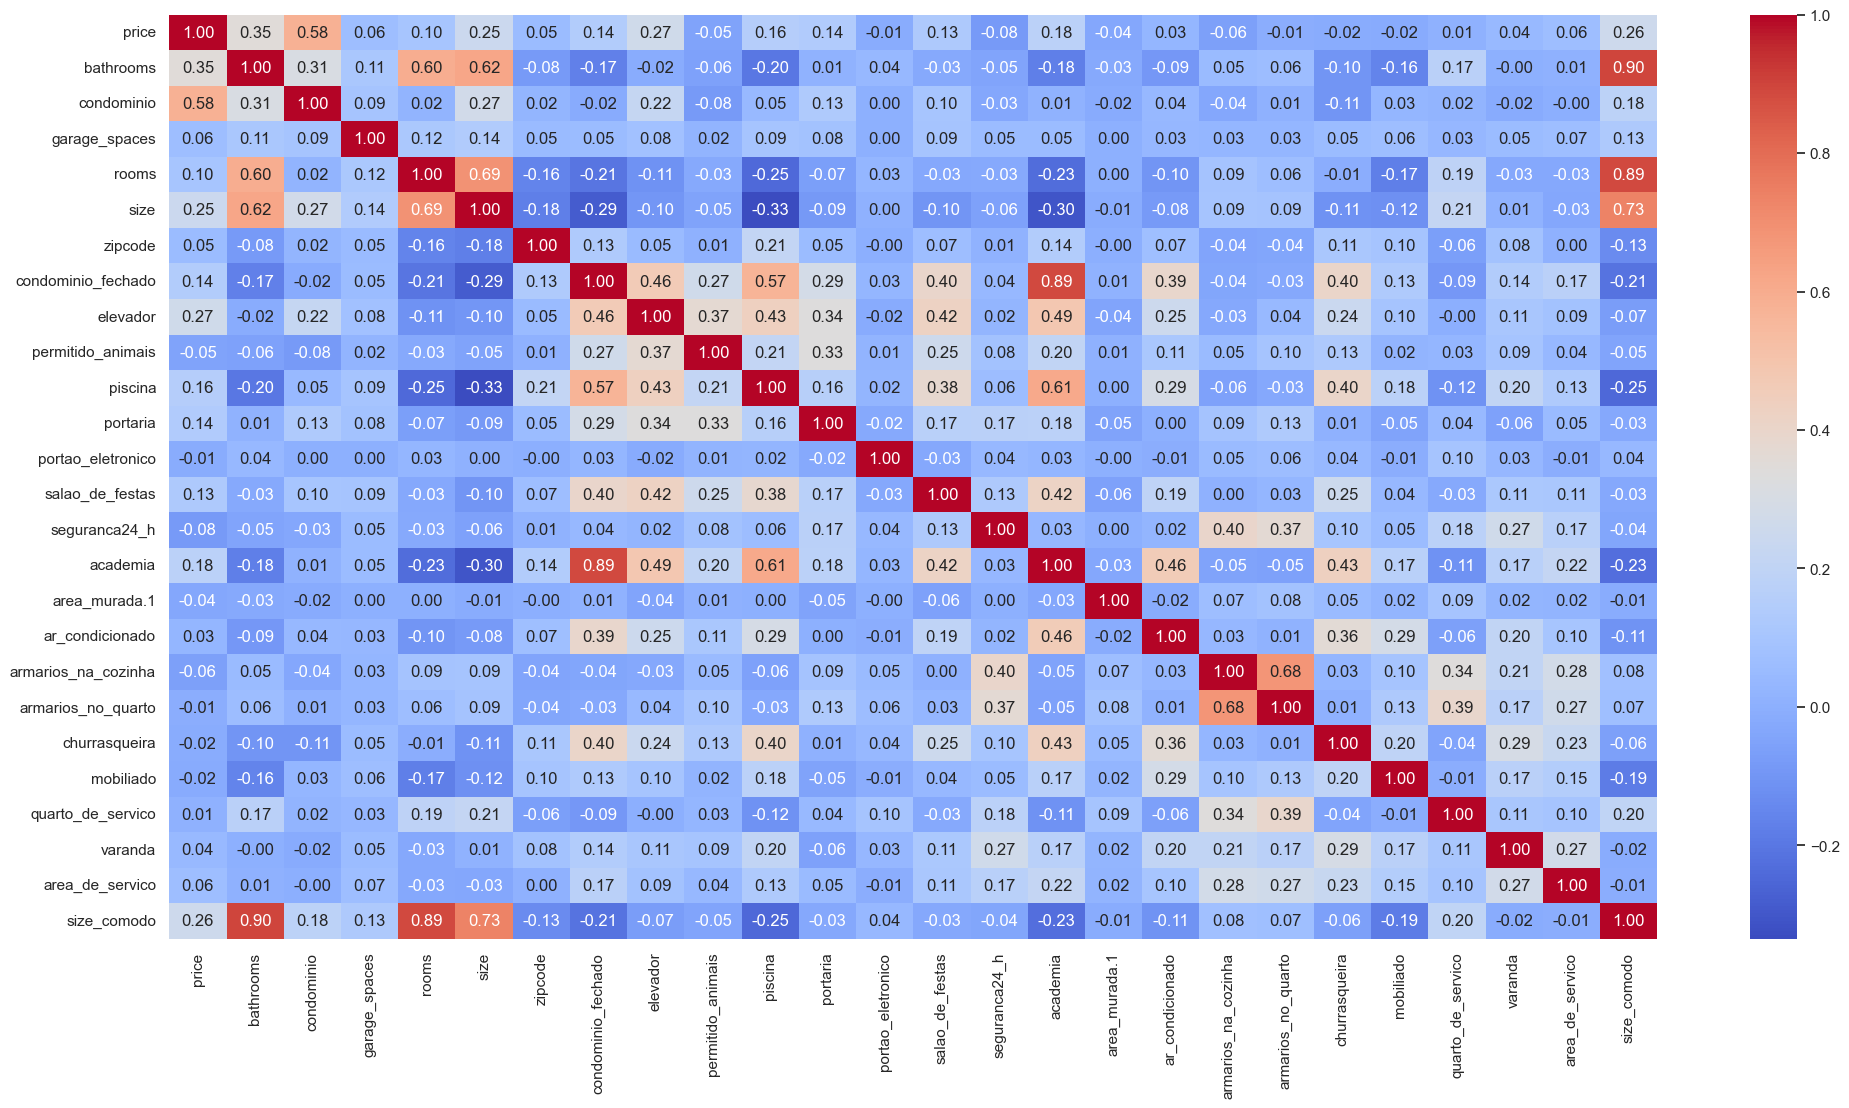

In [34]:
corr = data.corr(method='pearson')

column_order = ['price'] + [col for col in corr.columns if col != 'price']
corr = corr.reindex(columns=column_order, index=column_order)

plt.figure(figsize=(24, 12))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

<Axes: xlabel='condominio', ylabel='price'>

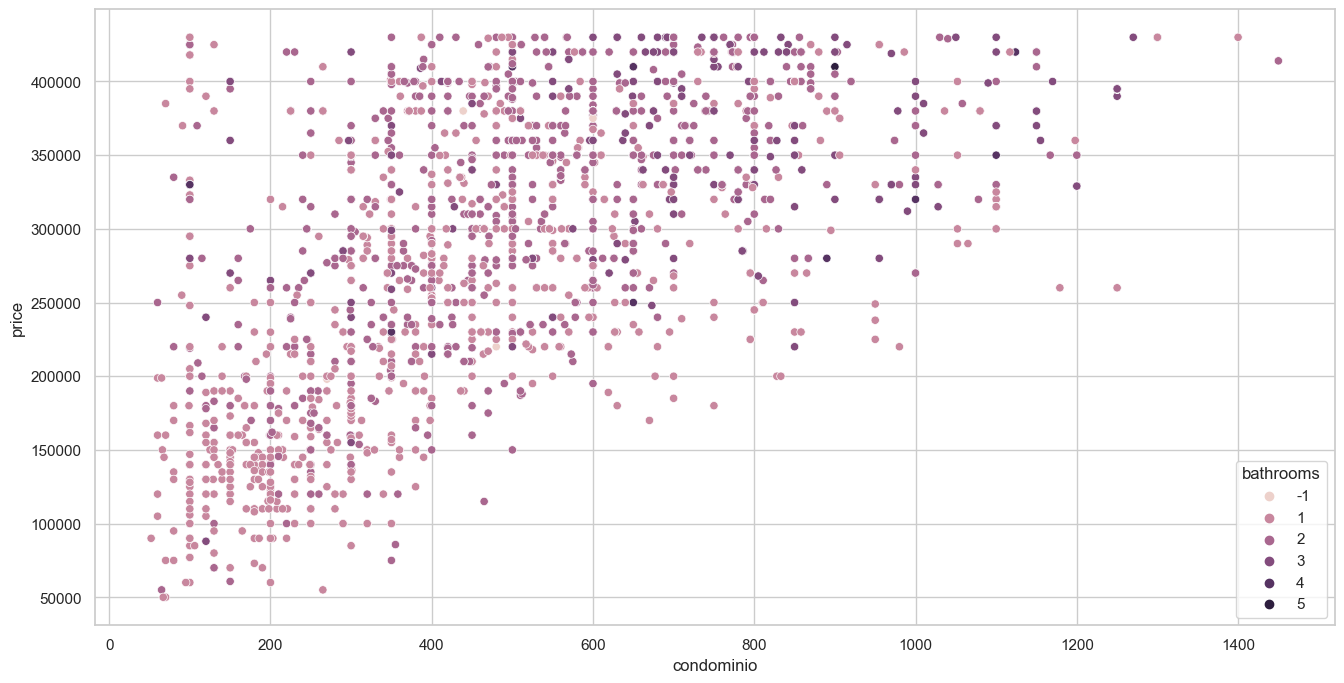

In [35]:
sns.scatterplot(y=data['price'],x=data['condominio'],hue=data['bathrooms'])

In [37]:
columns_to_check = [#'bathrooms',
                    #'condominio',
                    #'garage_spaces',
                    #'rooms',
                    #'size',
                    #'zipcode',
                    #'size_comodo',
                    'condominio_fechado',
                    'elevador',
                    'permitido_animais',
                    'piscina',
                    'portaria',
                    'salao_de_festas',
                    'seguranca24_h',
                    'academia',
                    'ar_condicionado',
                    'armarios_na_cozinha',
                    'armarios_no_quarto',
                    'churrasqueira',
                    'mobiliado',
                    'quarto_de_servico',
                    'varanda',
                    'area_de_servico']

result = data[(data[columns_to_check] <= 0).all(axis=1)]
result

,bathrooms,condominio,garage_spaces,price,rooms,size,zipcode,re_types,re_rent_full_price,condominio_fechado,elevador,permitido_animais,piscina,portaria,portao_eletronico,salao_de_festas,seguranca24_h,academia,area_murada.1,ar_condicionado,armarios_na_cozinha,armarios_no_quarto,churrasqueira,mobiliado,quarto_de_servico,varanda,area_de_servico,size_comodo
